In [ ]:
import numpy as np
import pandas

import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import LSTM


from keras.layers import Dropout

import matplotlib.pyplot as plt

# Load English tokenizer, tagger, parser, NER and word vectors
import spacy
nlp = spacy.load("en_core_web_sm")

tfds.disable_progress_bar()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Preparing data

In [ ]:
def preprocess(text):
    return " ".join([token.lemma_ for token in nlp(text) if not token.is_stop and token.is_ascii and not token.is_punct])

In [ ]:
def preprocess_data(df):
    tokenized_text = []
    labels = []
    for row in df.itertuples():
          tokenized_text.append(preprocess(row[1]))
          labels.append(row[2])

  
    features = {"seq": tokenized_text}
    labels = {"label": labels}
    return pandas.DataFrame(features),pandas.DataFrame(labels)

In [ ]:
df = pandas.read_csv("drive/MyDrive/Skola/TDDE16/tripadvisor_hotel_reviews.csv",encoding="utf8")

 
sequences, labels = preprocess_data(df)


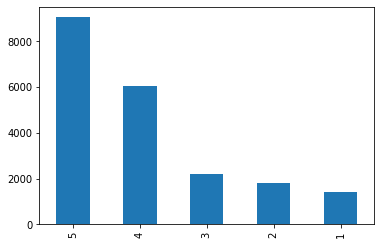

In [ ]:
labels["label"].value_counts().plot(kind='bar')

In [ ]:
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(sequences["seq"])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 47044 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(sequences["seq"])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (20491, 100)


In [ ]:
Y = pandas.get_dummies(labels["label"]).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (20491, 5)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16392, 100) (16392, 5)
(4099, 100) (4099, 5)


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(100))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(Y.shape[1], activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_split=0.2)

Epoch 1/20
103/103 [==============================] - 10s 30ms/step - loss: 1.3928 - accuracy: 0.4173 - val_loss: 1.0194 - val_accuracy: 0.5340
Epoch 2/20
103/103 [==============================] - 2s 23ms/step - loss: 0.9570 - accuracy: 0.5683 - val_loss: 0.9421 - val_accuracy: 0.5724
Epoch 3/20
103/103 [==============================] - 2s 23ms/step - loss: 0.8220 - accuracy: 0.6403 - val_loss: 0.9723 - val_accuracy: 0.5828
Epoch 4/20
103/103 [==============================] - 2s 23ms/step - loss: 0.7147 - accuracy: 0.6976 - val_loss: 0.9933 - val_accuracy: 0.5852
Epoch 5/20
103/103 [==============================] - 2s 24ms/step - loss: 0.6610 - accuracy: 0.7249 - val_loss: 1.0413 - val_accuracy: 0.5694
Epoch 6/20
103/103 [==============================] - 2s 23ms/step - loss: 0.5931 - accuracy: 0.7590 - val_loss: 1.2083 - val_accuracy: 0.5660
Epoch 7/20
103/103 [==============================] - 2s 24ms/step - loss: 0.5442 - accuracy: 0.7825 - val_loss: 1.1806 - val_accuracy: 0.563

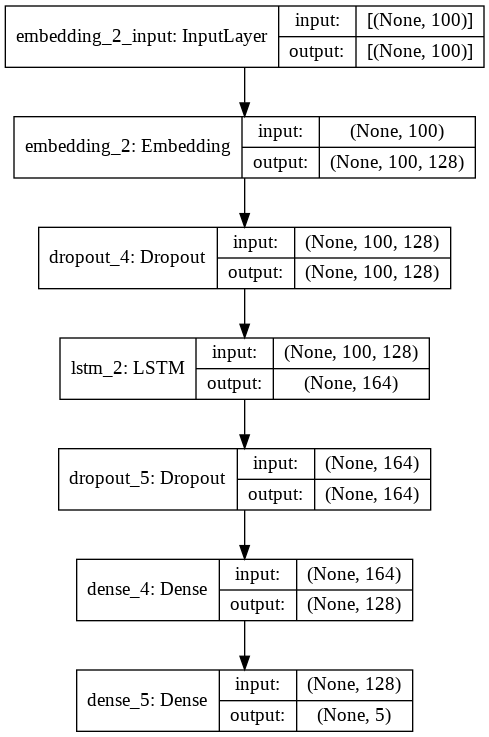

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

129/129 [==============================] - 1s 5ms/step - loss: 2.3454 - accuracy: 0.5345
Test set
  Loss: 2.345
  Accuracy: 0.535


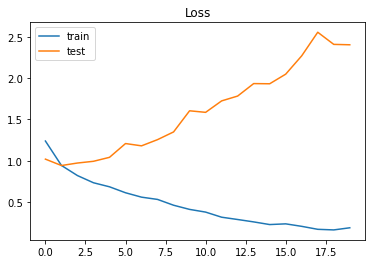

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

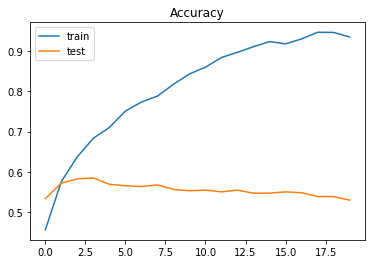

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Creating baseline

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier


In [ ]:

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(sequences, labels)

dummy_clf.predict(sequences)

dummy_clf.score(sequences, labels)

0.2016007027475477

# Evaluation of hyperparameters

In [ ]:
!pip install hyperas


In [ ]:

# Sklearn tools
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Keras preprocessing, models, evaluators
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import text, sequence
from keras import utils
from keras.models import load_model


import hyperas
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe

In [ ]:

def data():

  import spacy
  nlp = spacy.load("en_core_web_sm")
  df = pandas.read_csv("drive/MyDrive/Skola/TDDE16/tripadvisor_hotel_reviews.csv",encoding="utf8")
  #sequences, labels = preprocess_data(reviews_df)

  tokenized_text = []
  labels = []
  for row in df.itertuples():
    tokenized_text.append(" ".join([token.lemma_ for token in nlp(row[1]) if not token.is_stop and token.is_ascii and not token.is_punct]))
    labels.append(row[2])
  sequences = pandas.DataFrame({"seq": tokenized_text})
  labels = pandas.DataFrame({"label": labels})


  # The maximum number of words to be used. (most frequent)
  MAX_NB_WORDS = 5000
  # Max number of words in each complaint.
  MAX_SEQUENCE_LENGTH = 100
  # This is fixed.
  EMBEDDING_DIM = 200
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(sequences["seq"])
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  X = tokenizer.texts_to_sequences(sequences["seq"])
  X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data tensor:', X.shape)
  Y = pandas.get_dummies(labels["label"]).values
  print('Shape of label tensor:', Y.shape)


  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
  print(X_train.shape,Y_train.shape)
  print(X_test.shape,Y_test.shape)
  return X_train, Y_train, X_test, Y_test


In [ ]:
def create_model(X_train, Y_train, X_test, Y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, output_dim = 200 , input_length=X.shape[1])) #EMBEDDING_DIM
    model.add(Dropout({{choice([0,0.2, 0.4, 0.5, 0.6])}}))
    #model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))

    #model.add(Conv1D(filters = {{choice([50, 60, 80])}}, kernel_size = {{choice([10,15,20,30])}}, padding='valid', activation='relu', strides=1))
    model.add(tf.keras.layers.LSTM(units = 100))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = {{choice([64, 100, 128])}})))
    model.add(Dropout({{choice([0,0.2, 0.4, 0.5, 0.6])}}))

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(Y.shape[1], activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 2
    batch_size = 128

    result = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

    validation_acc = np.amax(result.history['val_accuracy']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [ ]:

try:
  best_run, best_model, space = optim.minimize(model=create_model,
                                           data=data,
                                           algo=tpe.suggest,
                                           max_evals=20,
                                           trials=Trials(),
                                           notebook_name='drive/MyDrive/Colab Notebooks/TDDE16_project',
                                           eval_space=True,
                                           return_space=True)
except Exception as e:
  print(e)  

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas
except:
    pass

try:
    import tensorflow_datasets as tfds
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from keras.layers import Dropout
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import spacy
except:
    pass

try:
    from tensorflow.keras.preprocessing.text import Tokenizer
except:
    pass

try:
    from tensorflow.keras.preprocessing.sequence import pad_sequences
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from sklearn.dummy import DummyClassifier
except:
    pass

try:
    from keras.wrappers.scikit_learn import KerasRegressor
except:
    pass

try:
    from sklearn.model_selection import cross_val_score
except:
    pass

try:
    from sklearn.

InvalidArgumentError: ignored

In [ ]:
X_train, Y_train, X_test, Y_test = data()    

Found 47044 unique tokens.
Shape of data tensor: (20491, 100)
Shape of label tensor: (20491, 5)
(18441, 100) (18441, 5)
(2050, 100) (2050, 5)


In [ ]:
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:


NameError: ignored

In [ ]:
model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(features_test, labels_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

16/16 [==============================] - 1s 65ms/step - loss: 0.0193 - mae: 0.0721 - accuracy: 0.0283


ValueError: ignored